In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal 
from matplotlib.ticker import NullFormatter
import sys
from PIL import Image
import os

In [2]:
mol = sys.argv[1]
geom = sys.argv[2]

In [3]:
image = False
exp_data = True
scaling_factor=0.965
broaden=2 # in cm-1, Gaussian, change in the code to L.

In [4]:
xmin = {}; xmax = {}
eV2kcal = 23.0605

In [5]:
os.getcwd()

'/home/crpbn/Desktop/Computational_Chem_Research/Tri_data/Tri_A154_0000'

In [6]:
IR = [] ; Int = []
for line in file('/home/crpbn/Desktop/Computational_Chem_Research/Tri_data/Tri_A154_0000/input.log','r').readlines():
    if "Frequencies" in line:
        for r in range(2,5):
            IR.append(float(line.split()[r]))
    if "IR Int" in line:
        for r in range(3,6):
            Int.append(float(line.split()[r]))

In [7]:
Int

[0.2582,
 0.9524,
 1.1389,
 1.4402,
 1.11,
 0.6913,
 0.1184,
 2.3246,
 1.3013,
 3.464,
 3.5862,
 4.9617,
 3.0183,
 2.2457,
 0.891,
 3.6723,
 3.1005,
 2.5535,
 11.5623,
 15.7072,
 4.4705,
 4.5454,
 5.3088,
 13.2327,
 104.7302,
 2.4145,
 11.3858,
 4.2934,
 7.9817,
 20.4684,
 3.7284,
 10.5757,
 4.9815,
 1.3136,
 16.6379,
 7.0918,
 0.3818,
 0.3756,
 8.3699,
 9.4513,
 16.75,
 5.5238,
 12.3576,
 6.9396,
 7.0533,
 15.848,
 14.6995,
 46.3375,
 14.6828,
 22.4799,
 4.1175,
 61.096,
 37.9044,
 196.7013,
 7.1023,
 41.629,
 7.0269,
 2.1818,
 5.0291,
 4.2079,
 18.9496,
 54.1913,
 2.6317,
 46.4913,
 13.7825,
 3.4769,
 33.8535,
 1.6442,
 9.6582,
 120.1547,
 27.045,
 45.8982,
 18.9948,
 16.7256,
 14.4853,
 56.6947,
 30.0049,
 121.8215,
 25.9996,
 8.4693,
 21.3584,
 3.9647,
 12.4981,
 8.8645,
 3.6619,
 6.3792,
 23.8839,
 6.2611,
 16.1036,
 3.8833,
 17.731,
 14.1384,
 8.7349,
 17.5526,
 8.0092,
 50.9931,
 2.4254,
 12.9305,
 20.9235,
 13.7292,
 117.8295,
 26.0117,
 60.6381,
 24.8559,
 51.4462,
 56.156,
 8

In [11]:
IR

[26.7912,
 29.3752,
 46.8679,
 52.9486,
 59.0117,
 63.7388,
 72.1372,
 75.4755,
 86.6031,
 90.1752,
 97.6698,
 104.2669,
 113.3914,
 123.6386,
 135.1285,
 143.6167,
 150.1632,
 152.2076,
 161.547,
 170.9373,
 174.9326,
 185.8158,
 191.225,
 196.0502,
 205.528,
 221.1813,
 228.0258,
 232.9498,
 242.2582,
 250.4624,
 252.146,
 258.7479,
 261.7672,
 268.2624,
 277.4229,
 290.3505,
 291.5295,
 296.9801,
 303.1251,
 310.8275,
 319.1801,
 320.7584,
 325.5201,
 328.9015,
 347.2948,
 354.2292,
 365.5473,
 378.0183,
 391.9073,
 403.556,
 415.7671,
 424.6537,
 425.6717,
 427.3334,
 433.1005,
 433.7836,
 444.2566,
 462.0133,
 466.1177,
 477.3462,
 489.4804,
 502.904,
 516.3397,
 525.9672,
 527.8867,
 553.9422,
 558.6097,
 570.1015,
 577.2073,
 583.6968,
 601.416,
 612.5855,
 618.5756,
 646.4212,
 648.0021,
 655.3342,
 671.2839,
 692.094,
 713.6549,
 732.9052,
 755.4291,
 762.5284,
 774.2428,
 791.6485,
 805.0978,
 816.3394,
 863.4888,
 895.275,
 912.263,
 920.8842,
 930.5136,
 933.3269,
 946.6843

In [12]:
data = np.zeros( (len(IR), 2) )
for n, ir, i  in zip(range(len(IR)), IR, Int): 
     data[n,0] = ir; data[n,1]=i

In [13]:
data

array([[2.6791200e+01, 2.5820000e-01],
       [2.9375200e+01, 9.5240000e-01],
       [4.6867900e+01, 1.1389000e+00],
       [5.2948600e+01, 1.4402000e+00],
       [5.9011700e+01, 1.1100000e+00],
       [6.3738800e+01, 6.9130000e-01],
       [7.2137200e+01, 1.1840000e-01],
       [7.5475500e+01, 2.3246000e+00],
       [8.6603100e+01, 1.3013000e+00],
       [9.0175200e+01, 3.4640000e+00],
       [9.7669800e+01, 3.5862000e+00],
       [1.0426690e+02, 4.9617000e+00],
       [1.1339140e+02, 3.0183000e+00],
       [1.2363860e+02, 2.2457000e+00],
       [1.3512850e+02, 8.9100000e-01],
       [1.4361670e+02, 3.6723000e+00],
       [1.5016320e+02, 3.1005000e+00],
       [1.5220760e+02, 2.5535000e+00],
       [1.6154700e+02, 1.1562300e+01],
       [1.7093730e+02, 1.5707200e+01],
       [1.7493260e+02, 4.4705000e+00],
       [1.8581580e+02, 4.5454000e+00],
       [1.9122500e+02, 5.3088000e+00],
       [1.9605020e+02, 1.3232700e+01],
       [2.0552800e+02, 1.0473020e+02],
       [2.2118130e+02, 2.

In [14]:
def gaussian(X,x0,s):
    return np.exp(-0.5*((X-x0)/s)**2)

def lorentz(X,x0,s):
    return 1/(np.pi*s*(1+((X-x0)/s)**2))

Ytot = np.zeros((4001,))
X=np.linspace(0, 4000,4001)
Y=np.zeros((4001,))
for l in range(data.shape[0]):
    Y = data[l,1]*gaussian(X, data[l,0], broaden)
    Ytot += Y

In [15]:
Ytot

array([2.79640115e-40, 2.00046180e-37, 1.11451893e-34, ...,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [16]:
fig = plt.figure(figsize=(16,4))

<Figure size 1152x288 with 0 Axes>

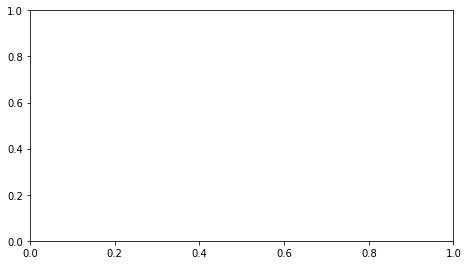

In [17]:
left, width = 0.02, 0.98
bottom, height = 0.1, 0.8
ax  = [left, bottom, width, height ]
ax  = plt.axes(ax)
xmin=800  ; xmax = 1800

In [ ]:
#Calculate scaling factors: 
scale_t  =  1/np.amax(Ytot[xmin:xmax+100])


ax.tick_params(axis='both', which='both', bottom='on', top='off', labelbottom='on', right='off', left='off', labelleft='off')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_tick_params(direction='out')
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_ylim(0,2)

In [ ]:
xticks = np.linspace(xmin,xmax,int((xmax-xmin)/100)+1)
ax.set_xticks(xticks[:-1])
ax.set_xticklabels([int(x) for x in xticks[:-1]], fontsize=20)
ax.set_xlim(xmin, xmax)
for t in xticks:
    ax.plot([t,t],[0,3], 'k--')

shift=1
Xsc = X*scaling_factor
Ysc = Ytot*scale_t
ir_theo = ax.plot(Xsc, -Ysc+shift, color='0.25', linewidth=2)
ax.fill_between(Xsc, np.linspace(shift, shift, len(Ysc)), -Ysc+1, color='0.5', alpha=0.5)
ax.plot([xmin,xmax], [shift, shift], 'k', lw=2)
plt.show()



In [ ]:
ir_theo
plt.show()